In [12]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : HandCrafted AntiSymmetric Bipolar Convolution


In [13]:
k = 20 # Top 10% highest l2-magnitude filters

In [14]:
F = 0

filters = np.zeros((3,3,1,1))

t = np.zeros((3,3))
t[0, 0] = 1.
filters = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1)) 
#filters /= np.sum(np.abs(filters))

#filters[:,:,0,0] =  (1/9)*np.array([[1,1,1], [1,1,1], [1,1,1]]) + (1/6)*np.array([[1,1,1], [0,0,0], [-1,-1,-1]]) 


theta = getSobelTF(filters)
print(filters.shape)
s, a = getSymAntiSymTF(filters)

a_mag = reduce_euclidean_norm(a, axis=[0,1])
s_mag = reduce_euclidean_norm(s, axis=[0,1])
mag = reduce_euclidean_norm(filters, axis=[0,1])


x =(a_mag[:,F]*np.cos((theta[:,F]))).numpy()
y =( a_mag[:,F]*np.sin((theta[:,F]))).numpy()
z =(s_mag[:,F]*np.sign(np.mean(s, axis=(0,1)))[:,F]).numpy()
plt.rcParams.update({'figure.dpi': '100'})




(3, 3, 1, 1)
(1, 3, 3, 1) (1, 3, 3, 1) (1, 3, 3, 1)


In [15]:
3//2

1

In [16]:
#var = 2/(128*9)

img = np.zeros((115,115)) # cv2.imread('input4.png', 0)/255. 
mid = img.shape[0]//2
img[mid, mid] = 1.
#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)
print(img.shape)

(115, 115)


In [17]:
np.var(img), 1/(128*9)


(7.560864919722271e-05, 0.0008680555555555555)

(324, 324)
(324, 324)


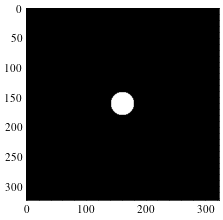

In [18]:
img =  cv2.imread('input4.png', 0)/255. 
#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)


img = cv2.copyMakeBorder(img, 
                                top=50, bottom=50, 
                                left=50, right=50, 
                                borderType=cv2.BORDER_CONSTANT, 
                                value=0)


print(img.shape)

mid = img.shape[0]//2



#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)
print(img.shape)

plt.imshow(img, cmap='gray')

(3, 3, 1, 1)
0
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(-4.7683716e-07, shape=(), dtype=float32) 10.999806
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
1
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(0.0, shape=(), dtype=float32) 11.030255
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
2
(1, 324, 324, 1)
VALS 0.99999994
tf.Tensor(4.7683716e-07, shape=(), dtype=float32) 11.06062
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
3
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(0.0, shape=(), dtype=float32) 11.090903
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
4
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(0.0, shape=(), dtype=float32) 11.121103
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
5
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(0.0, shape=(), dtype=float32) 11.151222
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
6
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(-4.7683716e-07, shape=(), dtype=float32) 11.180537
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
7
(1

/tmp/ipykernel_17269/3256919666.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


21
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(1.9650906e-07, shape=(), dtype=float32) 11.55589
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
22
(1, 324, 324, 1)
VALS 0.9999999
tf.Tensor(5.532056e-07, shape=(), dtype=float32) 11.57867
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
23
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(2.7392525e-07, shape=(), dtype=float32) 11.60131
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
24
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(-1.9581057e-07, shape=(), dtype=float32) 11.62382
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
25
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(4.0815212e-07, shape=(), dtype=float32) 11.646216
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
26
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(-1.06403604e-07, shape=(), dtype=float32) 11.668508
(1, 324, 324, 1)
100 [-50 -25] [  0  25  50  75 100 125]
27
(1, 324, 324, 1)
VALS 1.0
tf.Tensor(-6.8265945e-07, shape=(), dtype=float32) 11.690704
(1, 324, 324, 1)
100 [-50 -25]

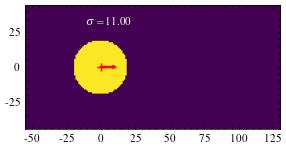

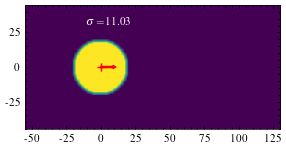

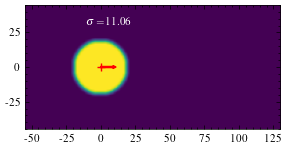

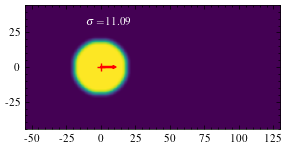

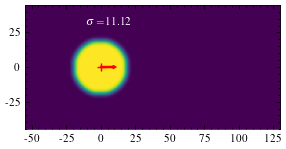

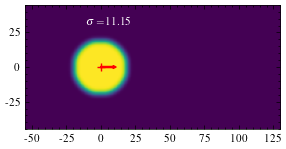

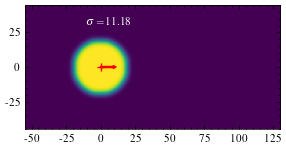

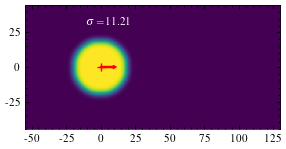

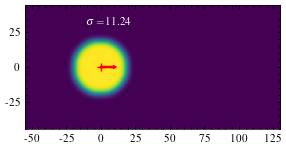

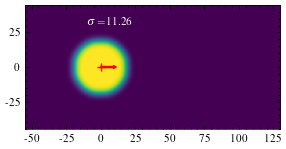

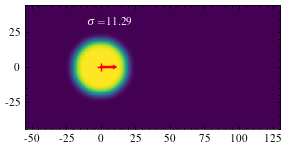

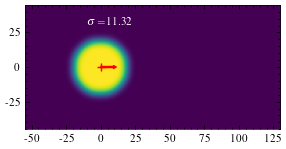

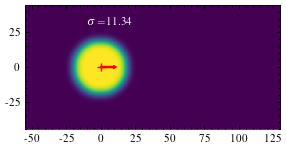

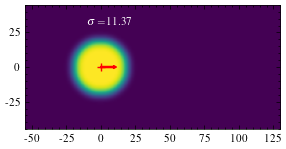

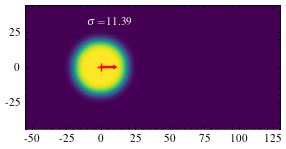

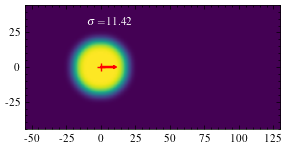

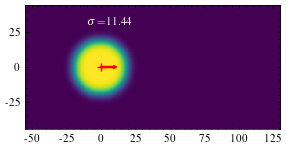

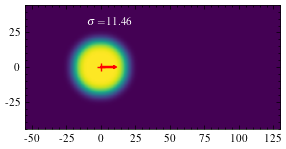

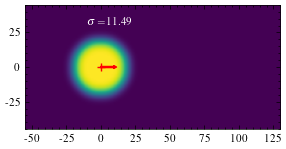

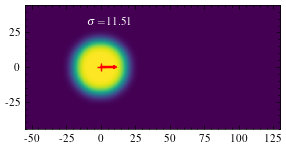

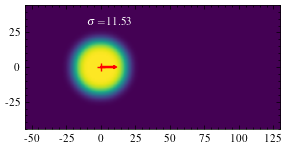

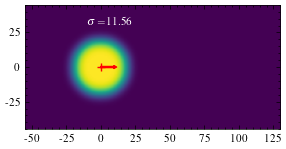

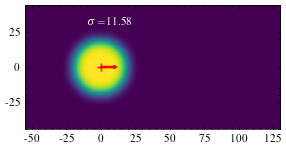

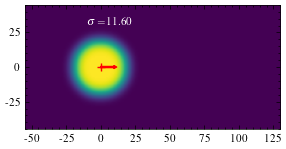

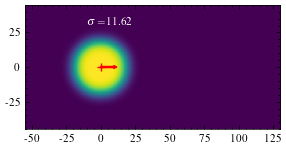

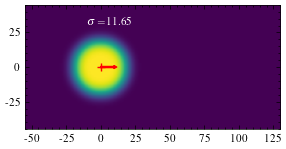

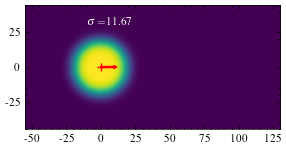

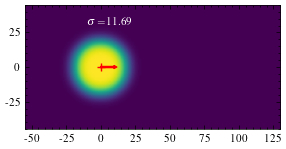

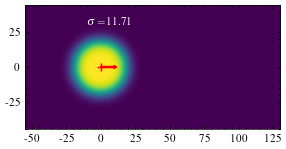

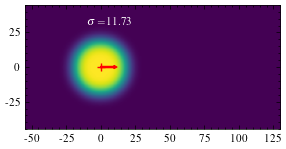

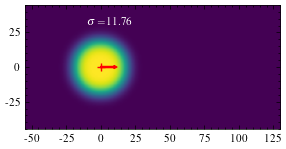

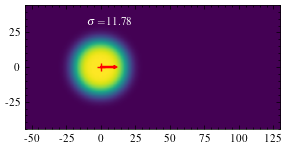

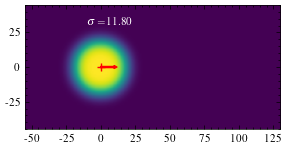

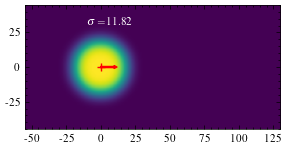

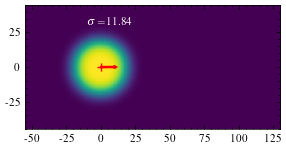

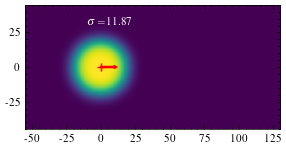

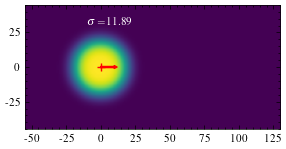

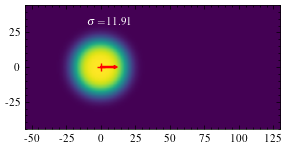

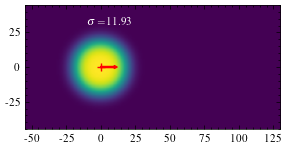

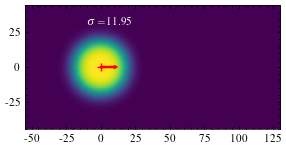

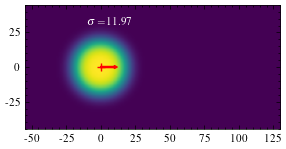

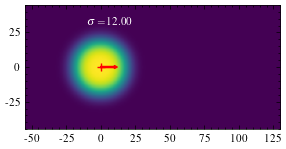

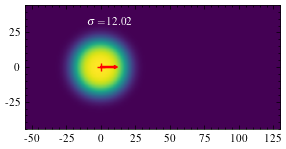

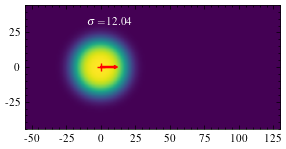

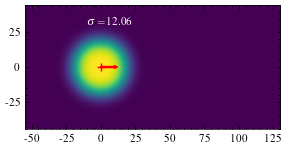

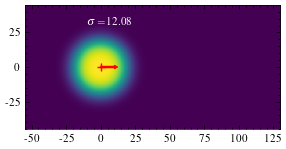

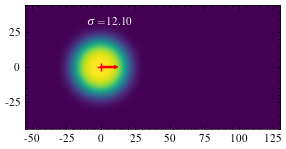

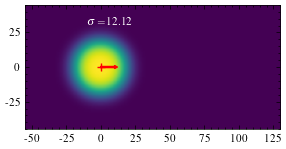

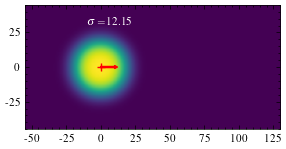

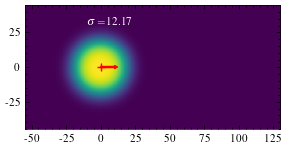

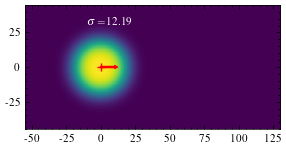

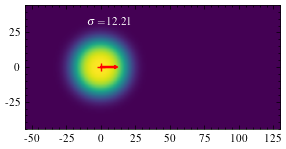

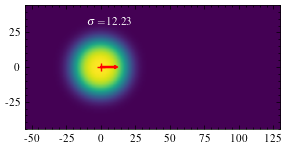

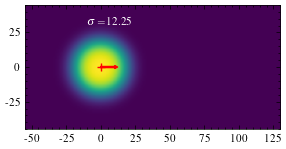

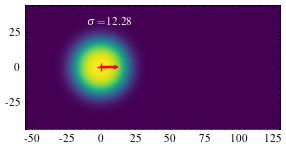

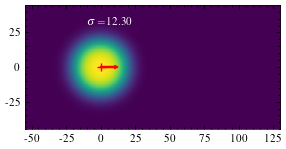

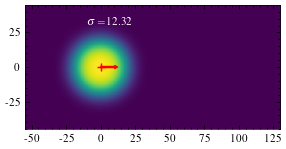

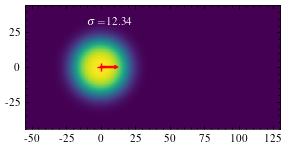

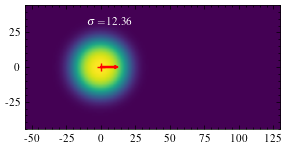

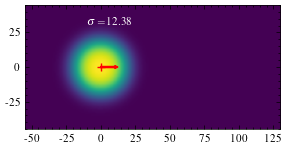

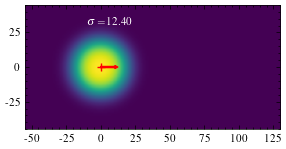

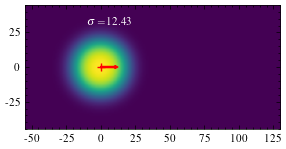

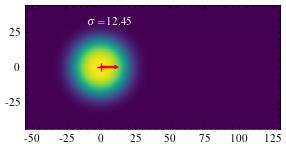

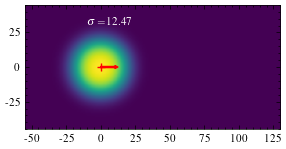

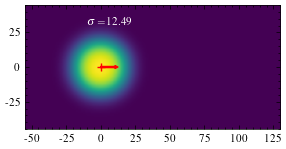

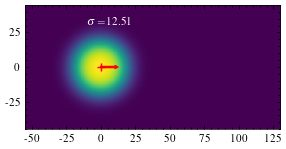

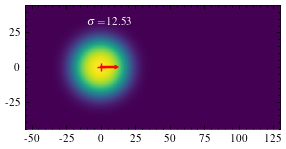

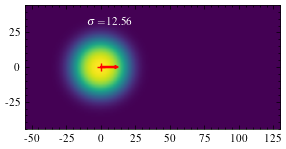

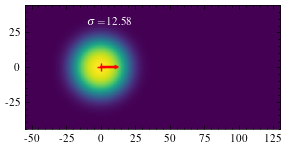

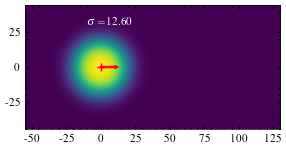

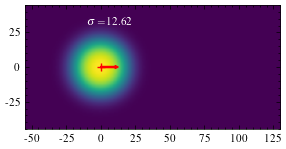

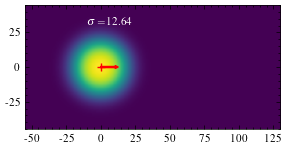

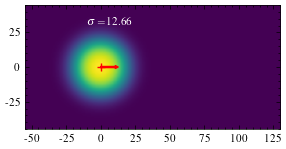

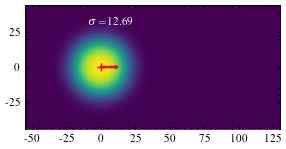

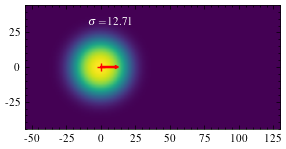

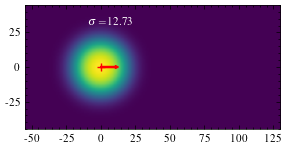

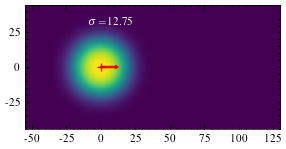

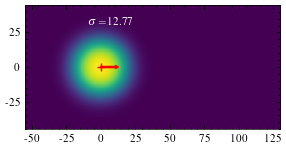

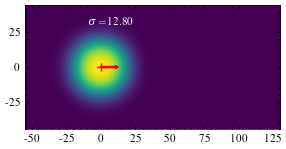

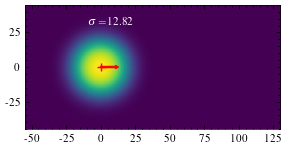

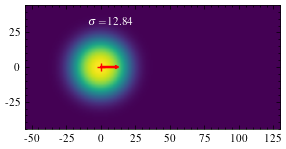

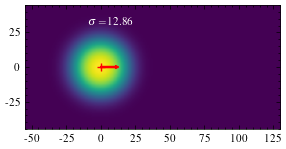

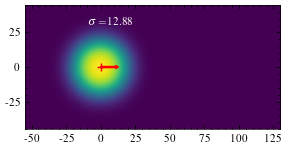

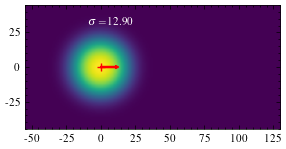

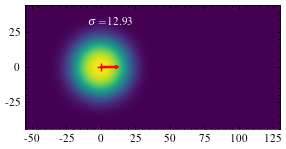

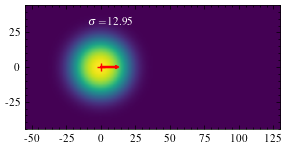

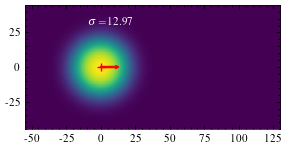

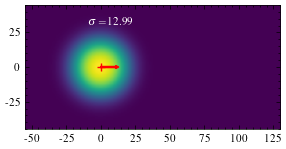

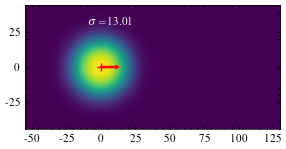

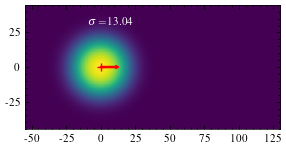

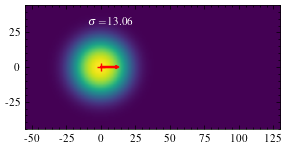

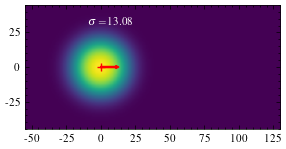

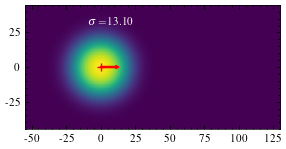

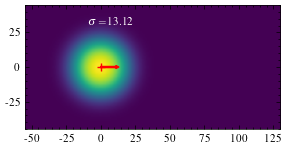

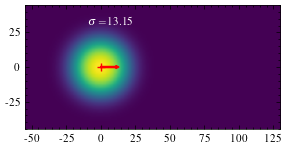

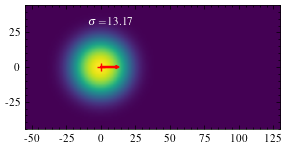

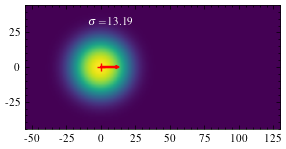

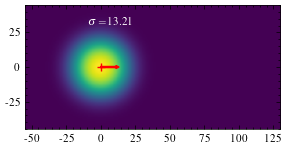

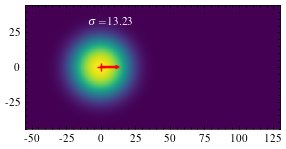

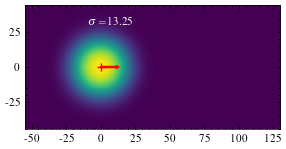

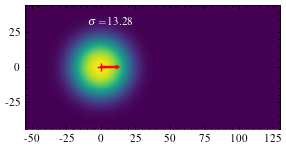

In [19]:
import matplotlib.patches as mpatches

w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
w = tf.transpose(w, perm=(1,0,2,3))
print(w.shape)

x = img


directory = f"figures/prop_unipolar_0"
if not os.path.exists(directory):
	os.makedirs(directory)
x = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32) 
for i in range(101):
	print(i)
	#if i in [0, 1, 25, 50, 75, 100]:
	fig, ax = plt.subplots()
	print(x.shape)
	x = x/np.std(x)
	vals = x[0, x.shape[1]//2, :, :]
	vals = vals/np.sum(vals)

	print("VALS", np.sum(vals))
	pos = np.expand_dims(np.linspace(-x.shape[1]//2, x.shape[1]//2, x.shape[1]),-1)
	mean = tf.reduce_sum(pos*vals)
	var = tf.reduce_sum(((pos-mean)**2) * vals)
	std = np.sqrt(var)
	print(mean, np.sqrt(var))
	
	#x = tf.repeat(x , repeats = filters.shape[-2], axis=-1)
	print(x.shape)

	im = ax.imshow(np.sum(x[0,:,:,:], axis=-1))
	ax.plot(mid, mid, marker = '+', color='red')

	#ax.plot(112+mean, 112, marker = ".", color='black')
	arr =  mpatches.FancyArrowPatch((mid+mean, mid), (mid+mean+std, mid),
							mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
	ax.add_patch(arr)
	
	ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 15), xycoords=arr, ha='center', va='bottom',color='white')
	#ax.arrow(, 112, dx=, dy= 0, color='black')

	xlim = (mid - 55, mid + 130)
	ylim = (mid - 45, mid + 45)
	ax.set_xlim(xlim)
	ax.set_ylim(ylim)

	# Define spacing
	step = 25

	# Compute ticks centered around `mid`, spaced by `step`, covering full view
	xticks_neg =   np.arange(-50//step * step, 0, step)
	xticks_pos = np.arange(0, 130 , step)
	xticks = np.concatenate((xticks_neg, xticks_pos)) + mid

	yticks_neg = np.arange(-65//step * step, 0, step)
	yticks_pos = np.arange(0, 65//step * step , step)
	yticks =  np.array([-25, 0, 25]) + mid  #np.concatenate((yticks_neg, yticks_pos)) + mid


	print(xlim[0] // step * step, xticks_neg, xticks_pos)


	# Ensure mid (origin) is present

	# Apply ticks and relabel with 0-centered view
	#xticks = np.arange(xlim[0]+1, xlim[1]+1 , step)
	#yticks = np.arange(ylim[0]+1, ylim[1]+1, step)

	# Set tick positions and labels (centered around mid)
	ax.set_xticks(xticks)
	ax.set_yticks(yticks)
	ax.set_xticklabels([x - mid for x in xticks])
	ax.set_yticklabels([y - mid for y in yticks])


	#ax.set_xticks(np.linspace(-round(std)-1, round(std)+1, int(0.5*(std)+3)))
	#fig.colorbar(im, orientation='vertical')
	fig.savefig(directory + f'/{i}.pdf', dpi=150,  transparent=True, bbox_inches='tight')

	x = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
							padding='SAME') )

(0.0, 224.0)

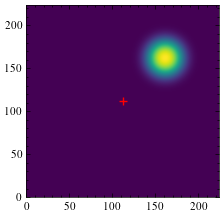

In [20]:
x = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
						padding='SAME') )
	
im = plt.imshow(np.sum(x[0,:,:,:], axis=-1))
plt.plot(112, 112, marker = '+', color='red')
plt.xlim([0, 224])#, ylim=(0, 224))
plt.ylim([0, 224])#, ylim=(0, 224))

#, ylim=(0, 224))

In [21]:
pos[:, x.shape[1]//2, : , :]

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [ ]:
pos

In [ ]:
pos[x.shape[1]//2]